In this notebook we begin writing code for finding the melancholia state.

In [1]:
cluster = True

In [3]:
import numpy as np
import sys

if cluster:
    sys.path.append('/rds/general/user/cfn18/home/Double-Well-SR/Deterministic-Model/')
    sys.path.append('/rds/general/user/cfn18/home/Instantons/L96-EBM-Instanton')
else: 
    sys.path.append('/Users/cfn18/Desktop/Double-Well-SR/Deterministic-Model/')

from fancyWell import *
import matplotlib.pyplot as plt

import l96EBM as l96ebm 

In [120]:
# Writing Class for M State Algoirtimg

def bisect(x, y):
    return x + 0.5 * (y - x)

def check_cold(ic, integrator): # M State class needs such a function for initialisation
    """
    Checks whether a given ic ends up at the cold point.
    """
    
    integrator.set_state(ic)
    tau = 0.1 # How long we integrate between checks, will effect how efficient we are
    
    for i in range(1000): # How many checks we make
        integrator.integrate(tau)
        if integrator.state[0] < -0.5: #Threshold for being cold #ENSURE YOUR COLD IC MATCHES THE TRUE statement
            return True
        elif integrator.state[0] > 0.5: #Threshold for being hot
            return False  
    return None

class MStateAlgorithm:
    
    def __init__(self, integrator, check_cold, tau, ic):
        
        self.integrator = integrator
        self.check_cold = check_cold
        self.cold_point, self.hot_point = ic
        self.cold_ts=[self.cold_point]
        self.hot_ts=[self.hot_point]
        self.tau = tau
        self.time = 0

        
    def _midpoint_update(self):
        
        # Find midpoint
        midpoint = bisect(self.cold_point, self.hot_point)

        # Check if it the midpoint is cold or hot
        midpoint_cold = self.check_cold(midpoint, self.integrator)

        # Update cold or hot point depending on result
        if midpoint_cold:
            self.cold_point = midpoint
        elif not midpoint_cold:
            self.hot_point = midpoint
        elif mid_point_cold is None: # check_cold didn't know
            self.cold_point = midpoint
                
    def _step(self):
        
        # Integate cold and hot points one step forward
        self.integrator.set_state(self.cold_point)
        self.integrator.integrate(tau)
        self.cold_point = self.integrator.state
    
        self.integrator.set_state(self.hot_point)
        self.integrator.integrate(tau)
        self.hot_point = integrator.state
        
        # Midpoint update
        self._midpoint_update()
        
        self.time += self.tau
    
    def run(self, steps, timer=False):
        for i in tqdm(range(steps), disable=timer):
            self._step()
            
            #UPDATE TO USE AN OBSEVERVER CLASS RATHER THAN THIS
            self.hot_ts.append(self.hot_point)
            self.cold_ts.append(self.cold_point)


            
# class MStateObserver:
    
#     def __init__(self, MStateAlgorithm):
#         self.alg = MStateAlgorithm
        
#     def 
        

In [121]:
tau = 0.1
alpha = 0.0
cold_init = np.array([-3, 0.9])
hot_init = np.array([20, 0.2])

integrator = FancyWellIntegrator(alpha)
mstate = MStateAlgorithm(integrator, check_cold, tau, [cold_init, hot_init])

In [122]:
mstate.run(10)

In [123]:
mstate.time

0.9999999999999999

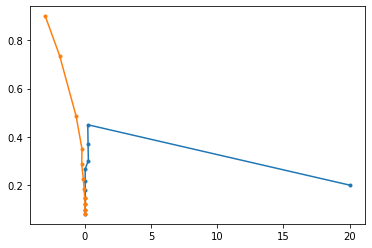

In [31]:
plt.plot(np.vstack(mstate.hot_ts)[:, 0], np.vstack(mstate.hot_ts)[:, 1],'.-')
plt.plot(np.vstack(mstate.cold_ts)[:, 0], np.vstack(mstate.cold_ts)[:, 1],'.-')

In [ ]:
integrator = l96ebm.Integrator()

In [ ]:
integrator.state[-1]

In [103]:
def l96_check_cold(ic, integrator): # M State class needs such a function for initialisation
    """
    Checks whether a given ic ends up at the cold point.
    """
    
    integrator.set_state(ic)
    tau = 0.1 # How long we integrate between checks, will effect how efficient we are
    
    for i in range(1000): # How many checks we make
        integrator.integrate(tau)
        if integrator.state[-1] < 260.0: #Threshold for being cold #ENSURE YOUR COLD IC MATCHES THE TRUE statement
            return True
        elif integrator.state[-1] > 290.0: #Threshold for being hot
            return False  
    return None

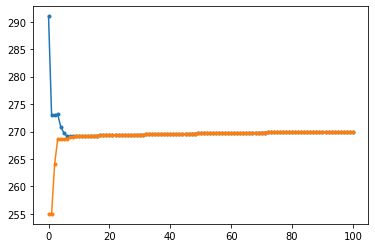

In [112]:
tau = 0.01

integrator = l96ebm.Integrator()
cold_init = integrator.state
cold_init[-1] = 255

hot_init = integrator.state
hot_init[-1] = 291

mstate = MStateAlgorithm(integrator, l96_check_cold, tau, [cold_init, hot_init])
mstate.run(100)
plt.plot(np.vstack(mstate.hot_ts)[:, -1],'.-')
plt.plot(np.vstack(mstate.cold_ts)[:, -1],'.-')

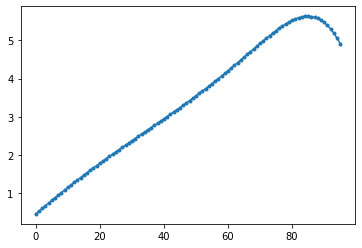

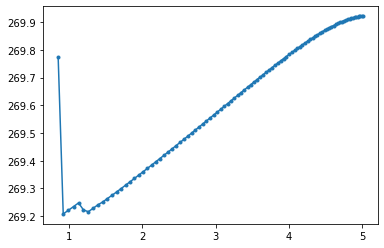

In [113]:
plt.plot(np.vstack(mstate.hot_ts)[5:, -3],'.-')
plt.show()
plt.plot(np.mean(np.vstack(mstate.cold_ts)[5:, :-2], axis=1), np.vstack(mstate.hot_ts)[5:, -1],'.-')

In [116]:
mstate.integrator.time

1746.0999999995065

In [ ]:
integrator.set_state(cold_init)

In [51]:
integrator = l96ebm.Integrator()

In [55]:
integrator.integrate(10)

In [98]:
runner = l96ebm.Integrator()
runner.set_state(cold_init)
looker = l96ebm.TrajectoryObserver(runner)
l96ebm.make_observations(runner, looker, 1000, 1, noprog=False)

100%|██████████| 1000/1000 [00:22<00:00, 44.68it/s]


In [114]:
runner.time

1000

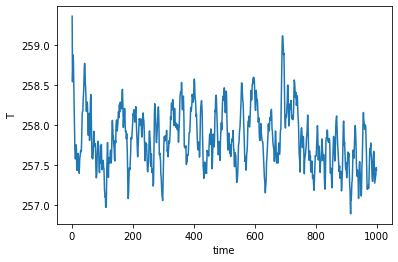

In [99]:
looker.observations.T.plot()

In [ ]:
# TO DO: FINISH THIS MSTATE OBSERVER CLASS SO THAT YOU CAN PLOT THE MSTATE


class L96_MState_Observer()
    """Observes the Mstate of L96 EBM model. Dumps to netcdf."""

    def __init__(self, mstate_alg, name='L96-EBM-MState'):
        """param, integrator: integrator being observed."""
        
        self.name = name
        self.dump_count = 0

        # Needed knowledge of the integrator
        self._parameters = mstate.integrator.parameter_dict
        self._K = mstate.integrator.K

        # Trajectory Observation logs
        self.time_obs = [] # Times we've made observations
        self.x_obs = []
        self.t_obs = []

    def look(self, mstate):
        """Observes trajectory of L96 trajectory"""

        # Note the time
        self.time_obs.append(mstate.time)

        # Making Observations
        
        self.x_obs.append(integrator.X.copy())
        self.t_obs.append(*integrator.T.copy())
        return

    @property
    def observations(self):
        """cupboard: Directory where to write netcdf."""
        if (len(self.x_obs) == 0):
            print('I have no observations! :(')
            return

        dic = {}
        _time = self.time_obs
        dic['X'] = xr.DataArray(self.x_obs, dims=['time', 'space'], name='X',
                                coords = {'time': _time,'space': np.arange(1, 1 + self._K)})
        dic['T'] = xr.DataArray(self.t_obs, dims=['time'], name='T',
                                coords = {'time': _time})
        return xr.Dataset(dic, attrs= self._parameters)

    def wipe(self):
        """Erases observations"""
        self.time_obs = []
        self.x_obs = []
        self.t_obs = []

    def dump(self, cupboard, name=None):
        """ Saves observations to netcdf and wipes.
        cupboard: Directory where to write netcdf.
        name: file name"""

        if (len(self.x_obs) == 0):
            print('I have no observations! :(')
            return

        if name == None:
            name=self.name

        save = cupboard + f'/{name}' + f'{self.dump_count + 1}.nc'
        self.observations.to_netcdf(save)
        print(f'Observations written to {save}. Erasing personal log.\n')
        self.wipe()
        self.dump_count +=1

In [124]:
mstate.state

AttributeError: 'MStateAlgorithm' object has no attribute 'state'